<a href="https://colab.research.google.com/github/KRITIKA-GAHLAWAT/House-Price-Prediction/blob/main/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 📌 House Price Prediction using Machine Learning (Regression)
# Google Colab Ready

# Install required libraries (if not already installed)
!pip install pandas scikit-learn matplotlib seaborn xgboost --quiet

# 📂 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [2]:
# 📥 2. Load Dataset
# Ames Housing dataset (public GitHub source)
url = "https://raw.githubusercontent.com/kirenz/datasets/master/ames.csv"
df = pd.read_csv(url)

print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (2930, 81)


,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,NaN,0,5,2010,WD,Normal,215000,-93.619754,42.054035
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,NaN,0,6,2010,WD,Normal,105000,-93.619756,42.053014
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Fence,NaN,0,4,2010,WD,Normal,244000,-93.617320,42.051245
4,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,Minimum_Privacy,NaN,0,3,2010,WD,Normal,189900,-93.638933,42.060899


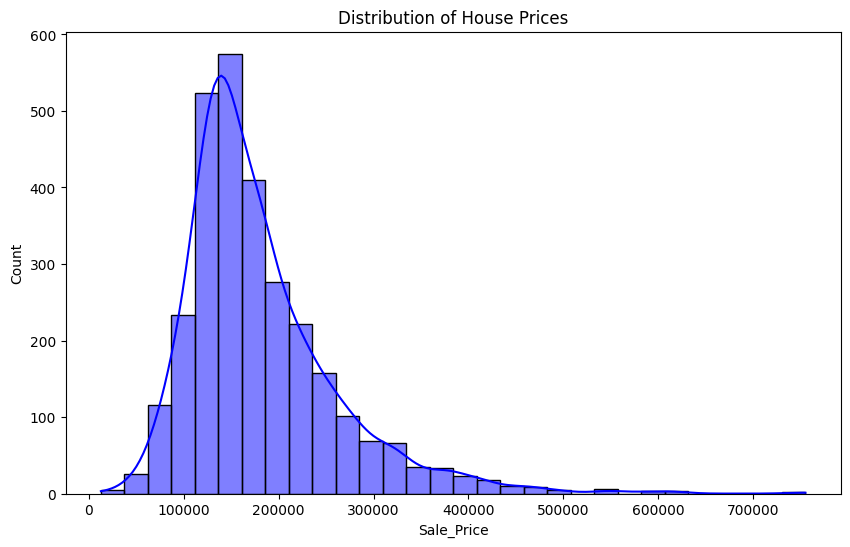

In [3]:
# 📊 3. Exploratory Data Analysis
plt.figure(figsize=(10,6))
sns.histplot(df['Sale_Price'], kde=True, bins=30, color='blue') # Corrected column name to 'Sale_Price'
plt.title("Distribution of House Prices")
plt.show()

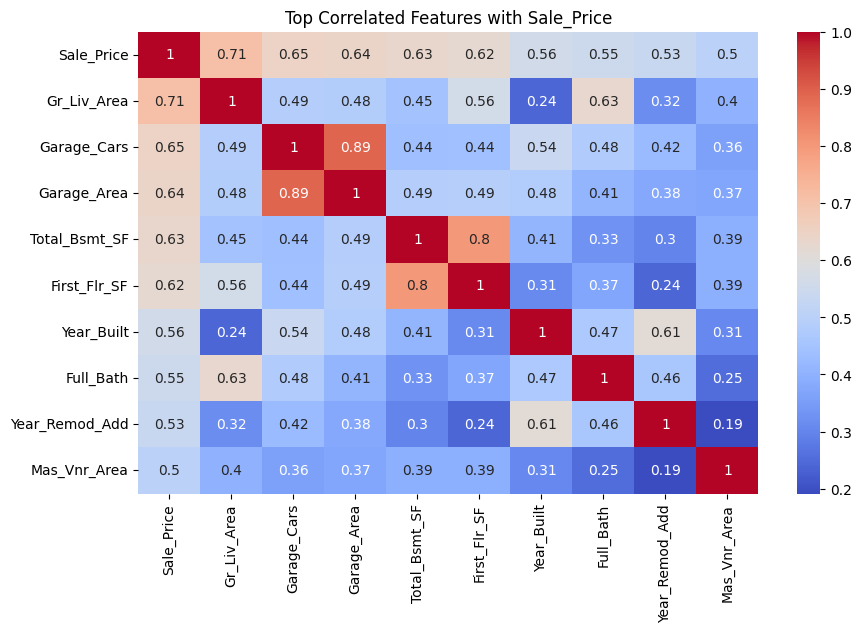

In [4]:
# 📉 Correlation Heatmap (Top 10 Features)
corr = df.corr(numeric_only=True)
top_corr_features = corr['Sale_Price'].abs().sort_values(ascending=False).head(10).index # Corrected column name to 'Sale_Price'
plt.figure(figsize=(10,6))
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="coolwarm")
plt.title("Top Correlated Features with Sale_Price") # Corrected title
plt.show()

In [5]:
# 🛠 4. Data Preprocessing
# Remove columns with too many missing values
df.dropna(axis=1, thresh=int(0.6*len(df)), inplace=True)

# Fill missing numeric values with median, categorical with mode
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

# Convert categorical columns to dummy variables
df = pd.get_dummies(df, drop_first=True)


In [6]:
# 📦 5. Split data
X = df.drop("Sale_Price", axis=1) # Corrected column name to 'Sale_Price'
y = df["Sale_Price"] # Corrected column name to 'Sale_Price'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# ⚖️ 6. Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [8]:
# 🤖 7. Model Training & Evaluation
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.001),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R2 Score": r2_score(y_test, y_pred)
    }


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.657e+11, tolerance: 1.394e+09
  model = cd_fast.enet_coordinate_descent(


In [9]:
# 📊 8. Display Results
results_df = pd.DataFrame(results).T
print("\nModel Performance:")
print(results_df)


Model Performance:
                            MAE          RMSE  R2 Score
Linear Regression  16127.202063  28895.956545  0.895856
Ridge Regression   16133.933851  28842.313990  0.896243
Lasso Regression   16117.603214  28869.134522  0.896050
Random Forest      16581.105085  28268.828133  0.900328
XGBoost            15857.406250  24318.295993  0.926239


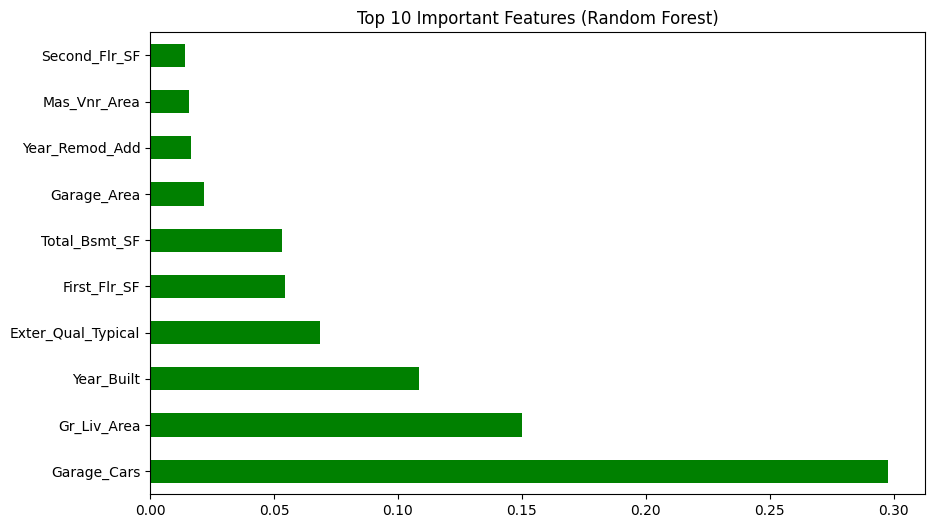

In [10]:
# 📈 9. Feature Importance (Random Forest Example)
rf_model = models["Random Forest"]
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
top_features = feature_importances.nlargest(10)

plt.figure(figsize=(10,6))
top_features.plot(kind='barh', color='green')
plt.title("Top 10 Important Features (Random Forest)")
plt.show()

In [12]:
# -----------------------------
# 10) Hyperparameter Tuning
# -----------------------------
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV

cv = KFold(n_splits=5, shuffle=True, random_state=42)

param_grids = {
    "Ridge Regression": {
        "alpha": [0.1, 1.0, 5.0, 10.0, 25.0, 50.0]
    },
    "Lasso Regression": {
        "alpha": [0.0005, 0.001, 0.005, 0.01, 0.05]
    },
    "Random Forest": {
        "n_estimators": [100, 300],
        "max_depth": [10, None],
        "min_samples_split": [2, 5],
        "min_samples_leaf": [1, 2]

    },
    "XGBoost": {
        "n_estimators": [300, 500, 800],
        "max_depth": [3, 4, 5, 6],
        "learning_rate": [0.01, 0.05, 0.1],
        "subsample": [0.8, 1.0],
        "colsample_bytree": [0.8, 1.0]
    }
}

tuned_models = {}
tuned_scores = []

for name in ["Ridge Regression", "Lasso Regression", "Random Forest", "XGBoost"]:
    print(f"\n🔧 Tuning {name}...")
    grid = RandomizedSearchCV(
        estimator=models[name],
        param_distributions=param_grids[name],
        n_iter=20,  # try 20 random combinations instead of all 81
        scoring="neg_root_mean_squared_error",
        cv=cv,
        n_jobs=-1,
        verbose=1,
        random_state=42
    )
    grid.fit(X_train, y_train)
    tuned_models[name] = grid.best_estimator_

    # Evaluate best model
    y_pred_val = grid.best_estimator_.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred_val)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_val))
    r2 = r2_score(y_test, y_pred_val)

    tuned_scores.append({
        "Model": name,
        "BestParams": grid.best_params_,
        "Val_MAE": mae,
        "Val_RMSE": rmse,
        "Val_R2": r2
    })
    print(f"   ➤ Best params: {grid.best_params_}")
    print(f"   ➤ Val RMSE: {rmse:.2f} | Val R2: {r2:.4f}")

tuned_df = pd.DataFrame(tuned_scores).sort_values("Val_RMSE")
print("\n📊 Tuned Model Performance:")
print(tuned_df)

# Select best model
best_name = tuned_df.iloc[0]["Model"]
best_model = tuned_models[best_name]
print(f"\n🏆 Selected Best Model: {best_name}")


🔧 Tuning Ridge Regression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=20. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


   ➤ Best params: {'alpha': 50.0}
   ➤ Val RMSE: 28793.50 | Val R2: 0.8966

🔧 Tuning Lasso Regression...
Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 5 is smaller than n_iter=20. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.526e+11, tolerance: 1.394e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


   ➤ Best params: {'alpha': 0.05}
   ➤ Val RMSE: 28868.35 | Val R2: 0.8961

🔧 Tuning Random Forest...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
   ➤ Best params: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
   ➤ Val RMSE: 28453.82 | Val R2: 0.8990

🔧 Tuning XGBoost...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
   ➤ Best params: {'subsample': 0.8, 'n_estimators': 800, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 1.0}
   ➤ Val RMSE: 23250.42 | Val R2: 0.9326

📊 Tuned Model Performance:
              Model                                         BestParams  \
3           XGBoost  {'subsample': 0.8, 'n_estimators': 800, 'max_d...   
2     Random Forest  {'n_estimators': 300, 'min_samples_split': 2, ...   
0  Ridge Regression                                    {'alpha': 50.0}   
1  Lasso Regression                                    {'alpha': 0.05}   

        Val_MAE      Val_RMSE    Val_R2  
3  

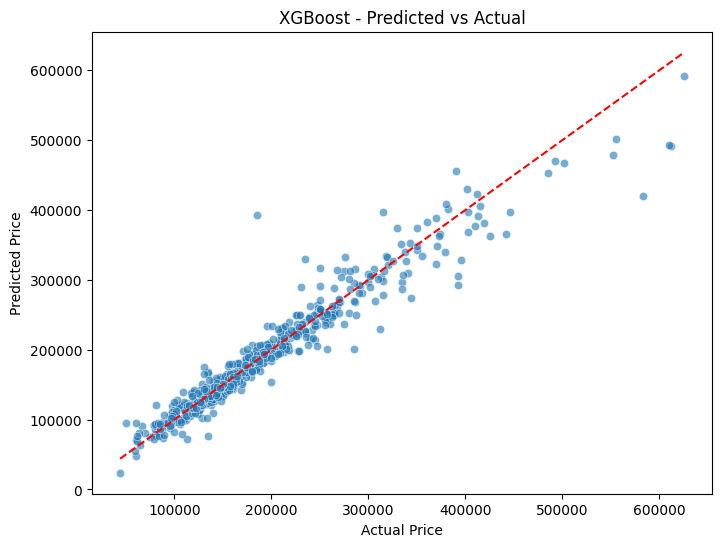

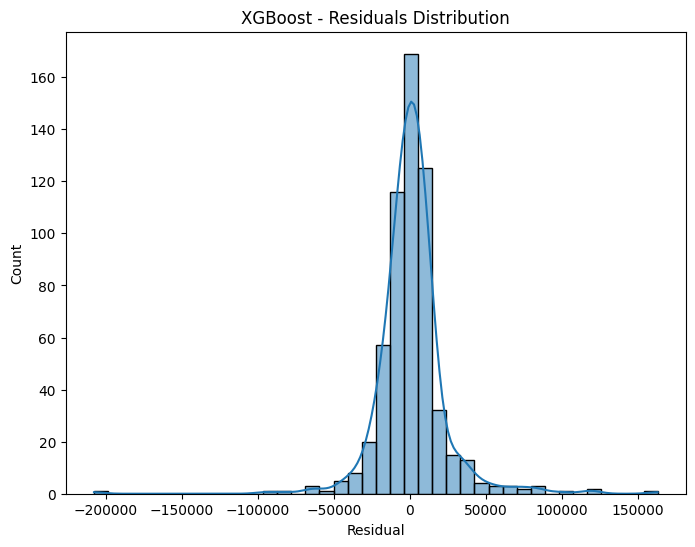

In [13]:
# -----------------------------
# 11) Residual Analysis
# -----------------------------
y_pred_test = best_model.predict(X_test)
residuals = y_test - y_pred_test

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(f"{best_name} - Predicted vs Actual")
plt.show()

plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, bins=40)
plt.title(f"{best_name} - Residuals Distribution")
plt.xlabel("Residual")
plt.show()

In [14]:
# -----------------------------
# 12) Save the Model
# -----------------------------
import joblib, os

os.makedirs("artifacts", exist_ok=True)
model_path = f"artifacts/{best_name.replace(' ', '_')}_model.joblib"
joblib.dump(best_model, model_path)
print(f"\n💾 Saved best model to: {model_path}")



💾 Saved best model to: artifacts/XGBoost_model.joblib


In [15]:
# -----------------------------
# 13) Quick Prediction Demo
# -----------------------------
sample = X_test[:5]
sample_pred = best_model.predict(sample)
infer_df = pd.DataFrame({
    "PredictedPrice": sample_pred.round(0),
    "ActualPrice": y_test[:5].values.round(0)
})
print("\n🔮 Inference Demo:")
print(infer_df)


🔮 Inference Demo:
   PredictedPrice  ActualPrice
0        166423.0       161000
1        108971.0       116000
2        189561.0       196500
3        132781.0       123600
4        115153.0       126000
